# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Emotions Analysis | BERT</p>

***We will do The Following Tasks in this Notebook to train a Bidirectional GRU on Emotion Analysis :***
- We Will Load Textual data and preprocess and clean the texts.
- We will do Tokenization and inter encoding using Tokeinzer Class.
- We will do Padding .
- We Will Train a Bidirectional GRU. to Get good Accuracy.
- We Will Visualize Results.
- Do Evaluations on Test Data.

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">About Dataset</p>

## Introduction:

[`Emotions`](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset:
<p>Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: 

- sadness (0)
- joy (1)
- love (2) 
- anger (3) 
- fear (4) 
- surprise (5) 

Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.</p>

## Key Features:
- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.

## Sample Data:
| text                                           | label |
|------------------------------------------------|-------|
| that was what i felt when i was finally accept…| 1     |
| i take every day as it comes i'm just focussin…| 4     |
| i give you plenty of attention even when i fee…| 0     |

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Loading Data</p>


In [2]:
# Load Data 
df = pd.read_csv('text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [4]:
# Count of Null Values 
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [5]:
# Count of Duplicates data
df.duplicated().sum()

0

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Renaming The Columns Names</p>


In [6]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Head Of Data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [8]:
# Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [9]:
# Head Of Data
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear
5,i was beginning to feel quite disheartened,Sadness
6,i would think that whomever would be lucky eno...,Love
7,i fear that they won t ever feel that deliciou...,Joy
8,im forever taking some time out to have a lie ...,Surprise
9,i can still lose the weight without feeling de...,Sadness


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Label Count</p>


/var/folders/n2/jwp2k4ln7b71fdbtbttgjhr40000gn/T/ipykernel_79149/3778936138.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


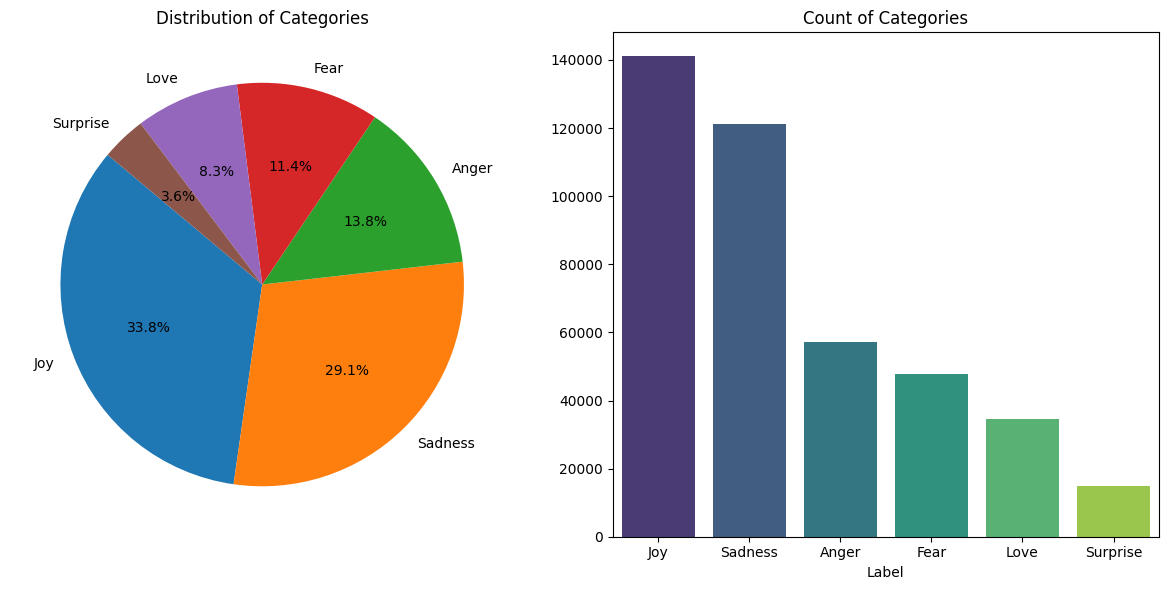

In [10]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Two Seperate Data Set for Visualizng text</p>

In [11]:
# Make Seperate Data Set to Visualize text 
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visualizing Text Using Word Cloud</p>

***A word cloud is a visual representation of text data in which the frequency of each word's occurrence is depicted by the size of the word. Words that appear more frequently in the text are typically displayed with a larger font size, while less frequent words are smaller.***

***Word clouds are often used to quickly and visually summarize the most common words or themes within a large body of text. They are popular in data analysis, text mining, and visualization tasks, as they provide a simple yet effective way to identify patterns and trends in textual data.***

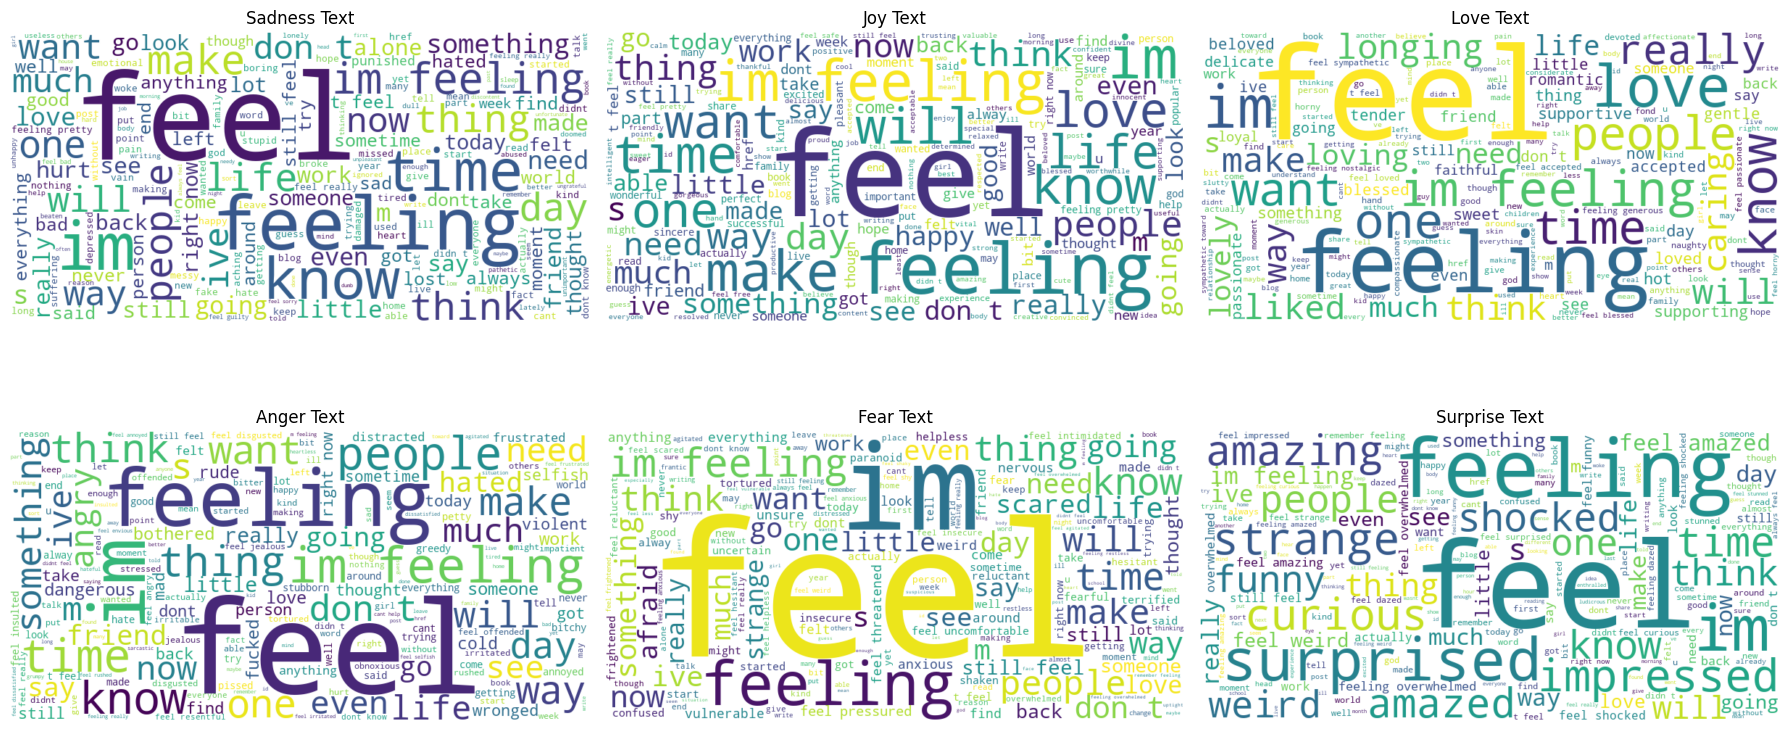

In [13]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Encode Label again</p>

In [14]:
# Now Unrename Label again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

/var/folders/n2/jwp2k4ln7b71fdbtbttgjhr40000gn/T/ipykernel_79149/488500057.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Text Preprocessing</p>

1. **Step 1: Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Step 2: Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Step 3: Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Step 4: Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Step 6: Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Step 8: Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Step 9: Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

***Overall, these preprocessing steps help clean and normalize the text data, removing noise and ensuring that the data is consistent and suitable for further analysis or modeling tasks.***

In [16]:
# Import Basis Needed Libaries 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to /Users/lejing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lejing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Url's</p>

In [19]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Special Characters and Punctuation</p>

In [20]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove WhiteSpaces Extra's</p>

In [21]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Numeric Values in Text</p>

In [22]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Lower Casing text</p>

In [25]:
# Step 6: Lowercasing
df['Text'] = df['Text'].str.lower()
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Stopwords</p>

In [26]:
# Step 8: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(10)

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
5,beginning feel quite disheartened,0
6,would think whomever would lucky enough stay s...,2
7,fear ever feel delicious excitement christmas ...,1
8,im forever taking time lie feel weird,5
9,still lose weight without feeling deprived,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Non-alpha Numeric</p>

In [27]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df.head(10)

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
5,beginning feel quite disheartened,0
6,would think whomever would lucky enough stay s...,2
7,fear ever feel delicious excitement christmas ...,1
8,im forever taking time lie feel weird,5
9,still lose weight without feeling deprived,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Train Test Split</p>

In [28]:
X = df['Text']
y = df['Label']

# Split train, test and validation set  
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                     random_state = 42,
                                                     test_size = 0.2,
                                                     shuffle=True)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp,
                                                 random_state = 42,
                                                 test_size = 0.5,
                                                 shuffle=True)

# Print the shapes of the training and testing sets
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_val:", X_val.shape)
print("Shape y_val:", y_val.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (333447,)
Shape y_train: (333447,)
Shape X_val: (41681,)
Shape y_val: (41681,)
Shape X_test: (41681,)
Shape y_test: (41681,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenization and Padding Sequences</p>

# TODO: 


1. **Tokenization:** Tokenization is the process of converting text into a sequence of numbers or tokens. The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The `num_words` parameter limits the vocabulary size to 50,000 most frequent words.

2. **Padding:** Padding is the process of adding zero values to a sequence of words so that all sequences have the same length. This is useful because RNN models require inputs with uniform length. Padding is performed to make the lengths of all sequences the same, regardless of the original length of the sentences. After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). Padding is done after the sequences to ensure that the actual content of the text is preserved. 

**Overall, the code prepares the text data for further processing and modeling by converting it into tokenized and padded sequences, making it suitable for use in machine learning algorithms such as neural networks.**

In [56]:
import torch
from transformers import BertModel, BertTokenizer
import tensorflow as tf

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BASEMODEL = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(BASEMODEL)

In [41]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
eos_token_idx = tokenizer.convert_tokens_to_ids(eos_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)

print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)

101 102 0 100


In [54]:
max_input_length = tokenizer.model_max_length
print(max_input_length)
print(tokenizer)

512
BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [ ]:
# bert = BertModel.from_pretrained('bert-base-uncased')

# Define the BERT-BiGRU model class
class BERTBiGRUModel(tf.keras.Model):
    def __init__(self, bert_model_name, num_classes):
        super(BERTBiGRUModel, self).__init__()
        # Load the BERT model
        self.bert = BertModel.from_pretrained(bert_model_name)
        # Specify the Bidirectional GRU layer
        self.bi_gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
        # A global max pooling layer to reduce the sequence dimension
        self.global_max_pool = tf.keras.layers.GlobalMaxPooling1D()
        # Classification layer
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Pass inputs through BERT
        bert_output = self.bert(inputs)[0]
        # Pass BERT outputs through BiGRU
        bigru_output = self.bi_gru(bert_output)
        # Reduce the sequence dimension
        pooled_output = self.global_max_pool(bigru_output)
        # Pass through the classifier
        return self.classifier(pooled_output)

In [65]:
import torch.nn as nn

bert = BertModel.from_pretrained('bert-base-uncased')

class BERTBiGRUModel(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim, 
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size']
        
        self.rnn = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [batch size, sent len]
                
        with torch.no_grad():
            embedded = self.bert(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        
        _, hidden = self.rnn(embedded)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
        
        #output = [batch size, out dim]
        
        return output

In [66]:
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BERTBiGRUModel(bert,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT)

In [67]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

In [68]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [58]:
num_classes = 5  # Example for 5-class classification problem
model = BERTBiGRUModel(basemodel, num_classes)

# Model Compilation (Specify loss function, optimizer, and metrics)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [61]:
history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_val_padded, y_val))

Epoch 1/5


TypeError: Exception encountered when calling BERTBiGRUModel.call().

[1mOnly integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got [-1, 0][0m

Arguments received by BERTBiGRUModel.call():
  • inputs=tf.Tensor(shape=(None, 79), dtype=int32)

In [29]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(list(X_train) + list(X_val))
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [30]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [31]:
# Perform padding on X_train, X_val and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train, X_val and X_test
print("X_train_padded:")
print(X_train_padded)
print("X_val_padded:")
print(X_val_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   17 28763    69 ...     0     0     0]
 [  270     5   721 ...     0     0     0]
 [    1    44   723 ...     0     0     0]
 ...
 [    1   594     0 ...     0     0     0]
 [    4    15   479 ...     0     0     0]
 [    1   149  1754 ...     0     0     0]]
X_val_padded:
[[1197  804 2055 ...    0    0    0]
 [   4   15  618 ...    0    0    0]
 [   4  336    1 ...    0    0    0]
 ...
 [   1  575  365 ...    0    0    0]
 [  25  280 1650 ...    0    0    0]
 [   1 1254  429 ...    0    0    0]]

X_test_padded:
[[   3 4011 3084 ...    0    0    0]
 [  87    1  257 ...    0    0    0]
 [  39  184   59 ...    0    0    0]
 ...
 [3249  128  392 ...    0    0    0]
 [  58    3  114 ...    0    0    0]
 [   1  248 4396 ...    0    0    0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Input Size</p>

In [32]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

50000

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Building: BERT</p>

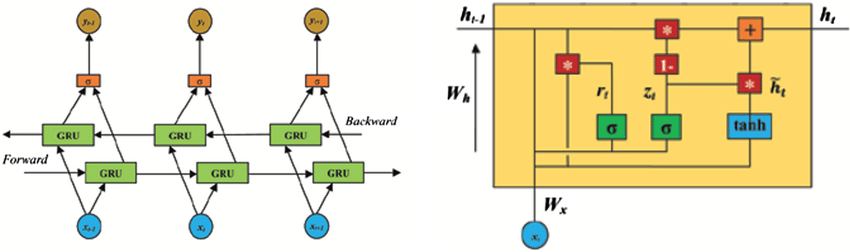

***I am Using BiDirectional GRU Here To Get Better Performence.Bidirectional Gated Recurrent Units (GRUs) are essential in natural language processing and sequence modeling tasks due to their ability to capture bidirectional dependencies in sequential data. Unlike traditional unidirectional models, which only process data in one direction (either forward or backward), bidirectional GRUs process input sequences in both directions simultaneously. This allows them to incorporate information from past and future context, enabling more comprehensive understanding and representation of the input sequence. By considering context from both directions, bidirectional GRUs excel in capturing long-range dependencies, especially in tasks where context plays a crucial role, such as sentiment analysis, machine translation, and named entity recognition. This bidirectional processing capability enhances model performance by capturing more nuanced relationships within the data, leading to improved accuracy and robustness in various sequence modeling tasks.***

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- Two Bidirectional GRU layers are added sequentially. Bidirectional layers process the input sequence in both directions, allowing the model to capture information from past and future states. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- Another Bidirectional GRU layer is added to capture bidirectional dependencies more effectively.

- The final `Dense` layer with 6 units (for 6 classes) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

ModuleNotFoundError: No module named 'transformers'

In [ ]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 79, 50)            2500000   

                                                                 

 dropout_1 (Dropout)         (None, 79, 50)            0         

                                                                 

 bidirectional_6 (Bidirecti  (None, 79, 240)           123840    

 onal)                                                           

                                                                 

 bidirectional_7 (Bidirecti  (None, 79, 128)           117504    

 onal)                                                           

                                                                 

 batch_normalization_2 (Bat  (None, 79, 128)           512       

 chNormalization)                                                

                                      

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [ ]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5

223/223 [==============================] - 46s 166ms/step - loss: 0.4648 - accuracy: 0.8203 - val_loss: 0.6911 - val_accuracy: 0.8489

Epoch 2/5

223/223 [==============================] - 34s 151ms/step - loss: 0.1137 - accuracy: 0.9362 - val_loss: 0.1204 - val_accuracy: 0.9359

Epoch 3/5

223/223 [==============================] - 33s 147ms/step - loss: 0.0970 - accuracy: 0.9401 - val_loss: 0.0942 - val_accuracy: 0.9377

Epoch 4/5

223/223 [==============================] - 33s 147ms/step - loss: 0.0919 - accuracy: 0.9420 - val_loss: 0.0943 - val_accuracy: 0.9382

Epoch 5/5

223/223 [==============================] - 32s 145ms/step - loss: 0.0890 - accuracy: 0.9426 - val_loss: 0.0943 - val_accuracy: 0.9358


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

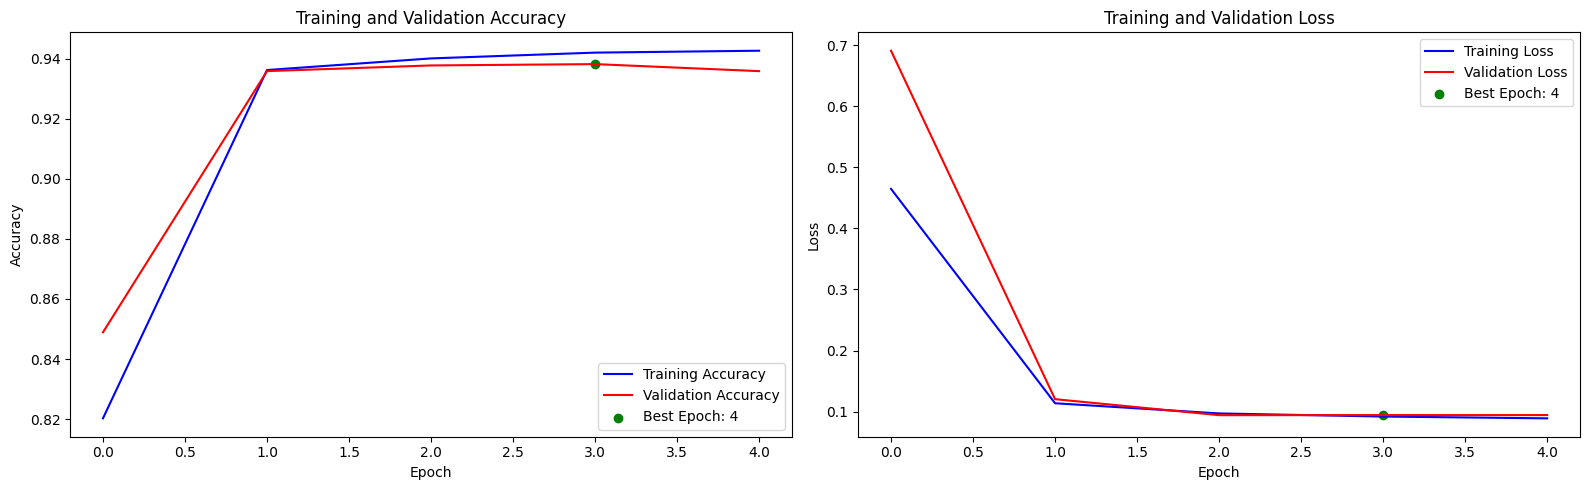

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [ ]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 31s 12ms/step - loss: 0.0943 - accuracy: 0.9358


[0.09433487057685852, 0.9358460903167725]

In [ ]:
# Predictions On Test For Confustion Matrix 
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 [==============================] - 27s 10ms/step


<Axes: >

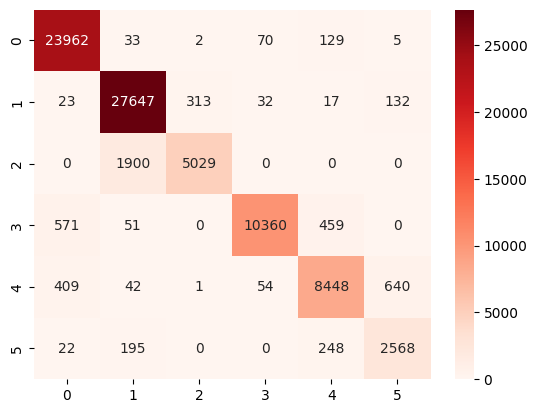

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">The End</p>